<a href="https://colab.research.google.com/github/TienLungSun/AI-Lecture-notes/blob/main/%E7%B7%B4%E7%BF%92%20Read%20subject%20tracking%20file%20and%20calculate%20time%20frequency%20representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [1]:
#load data file to colab
from google.colab import files
uploaded = files.upload()

Saving Taiguo_JointDetection.csv to Taiguo_JointDetection.csv


In [2]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

Taiguo_JointDetection.csv


In [3]:
import pandas as pd
df=pd.read_csv(fname)

In [4]:
df.head(3)

,frameNo,sid,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
0,1,1,663.438354,176.039490,669.179504,170.277161,658.414856,169.556870,677.073608,168.116302,648.367798,163.074280,688.555908,200.529343,631.861938,196.927887,693.579468,251.669922,621.097229,250.949615,691.426514,301.369904,618.226685,301.369904,674.203003,304.251068,639.756042,307.852509,669.179504,387.804657,641.908997,389.965546,665.591248,457.672760,644.779541,455.511902
1,1,2,497.138031,175.129608,502.879913,170.805801,493.549347,170.805801,508.621796,178.012146,486.371979,174.408966,517.952332,216.205811,474.170471,213.323257,522.976501,263.047089,466.275391,263.047089,521.541016,307.726501,463.404419,304.123322,510.057281,304.843933,479.912354,304.843933,508.621796,371.863007,480.630066,370.421753,533.742554,386.996368,482.783295,386.996368
2,1,3,291.803864,135.907669,298.244507,130.866974,288.225708,129.426758,308.978943,137.347870,281.069397,133.747360,318.282135,182.714157,271.050598,182.714157,324.007172,235.281448,264.609955,235.281448,321.144653,286.408569,261.031799,284.968353,306.116425,288.568848,275.344391,288.568848,301.822662,370.660217,276.775635,370.660217,300.391418,446.990784,281.069397,446.270721


In [5]:
df.columns

Index(['frameNo', 'sid', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5',
       'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10',
       'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15',
       'x16', 'y16', 'x17', 'y17'],
      dtype='object')

In [7]:
sid=1

In [8]:
# select a column of a subject ID\
df = df[ df['sid']== sid] 

In [9]:
df.head(3)

,frameNo,sid,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
0,1,1,663.438354,176.039490,669.179504,170.277161,658.414856,169.556870,677.073608,168.116302,648.367798,163.074280,688.555908,200.529343,631.861938,196.927887,693.579468,251.669922,621.097229,250.949615,691.426514,301.369904,618.226685,301.369904,674.203003,304.251068,639.756042,307.852509,669.179504,387.804657,641.908997,389.965546,665.591248,457.672760,644.779541,455.511902
9,2,1,662.478699,175.904449,669.663940,170.862228,657.448975,169.421585,676.849243,167.260620,648.826660,162.938705,688.345703,199.674988,631.581970,198.234360,693.375366,250.817688,620.804077,249.377045,690.501282,299.799408,617.929932,299.799408,673.975159,306.282288,640.204285,307.002594,668.945435,387.678406,641.641357,388.398712,665.352783,457.549377,645.234009,456.108734
18,3,1,662.366699,175.856171,668.846375,170.813263,657.327026,169.372421,676.046021,167.931595,648.687439,163.609100,688.285400,200.350311,631.408325,198.189056,693.325134,251.499847,620.608887,250.058990,689.725281,300.488098,617.729004,300.488098,673.886108,306.971863,640.047852,307.692261,668.846375,387.658417,641.487793,389.099243,665.246582,457.538757,645.087646,456.097961


5,6:L/R shoulder

9,10: L/R wirst

13,14: L/R knee

For more joint indices: https://learnopencv.com/human-pose-estimation-using-keypoint-rcnn-in-pytorch/?ck_subscriber_id=297191382



In [11]:
#select a column
dfx = df['x10']

In [12]:
#convert to numpy array
import numpy as np
x = np.array(dfx.values)
print(x.shape)

(177,)


In [13]:
length = x.shape[0]
print(length)

177


In [14]:
#time line data pts
t, dt = np.linspace(0, length, length, retstep=True)
print(t.shape, dt)
print("Time", end=":")
for i in range(length):
  print("%.3f" % t[i], end=", ")

(177,) 1.0056818181818181
Time:0.000, 1.006, 2.011, 3.017, 4.023, 5.028, 6.034, 7.040, 8.045, 9.051, 10.057, 11.062, 12.068, 13.074, 14.080, 15.085, 16.091, 17.097, 18.102, 19.108, 20.114, 21.119, 22.125, 23.131, 24.136, 25.142, 26.148, 27.153, 28.159, 29.165, 30.170, 31.176, 32.182, 33.188, 34.193, 35.199, 36.205, 37.210, 38.216, 39.222, 40.227, 41.233, 42.239, 43.244, 44.250, 45.256, 46.261, 47.267, 48.273, 49.278, 50.284, 51.290, 52.295, 53.301, 54.307, 55.312, 56.318, 57.324, 58.330, 59.335, 60.341, 61.347, 62.352, 63.358, 64.364, 65.369, 66.375, 67.381, 68.386, 69.392, 70.398, 71.403, 72.409, 73.415, 74.420, 75.426, 76.432, 77.438, 78.443, 79.449, 80.455, 81.460, 82.466, 83.472, 84.477, 85.483, 86.489, 87.494, 88.500, 89.506, 90.511, 91.517, 92.523, 93.528, 94.534, 95.540, 96.545, 97.551, 98.557, 99.562, 100.568, 101.574, 102.580, 103.585, 104.591, 105.597, 106.602, 107.608, 108.614, 109.619, 110.625, 111.631, 112.636, 113.642, 114.648, 115.653, 116.659, 117.665, 118.670, 119.676,

In [15]:
#freq.domain data pts
freq = np.linspace(1, 5, 10) #consider 10 freq between 1~5
print(freq.shape)
print("Freq", end=":")
for i in range(freq.shape[0]):
  print("%.3f" % freq[i], end=", ")

(10,)
Freq:1.000, 1.444, 1.889, 2.333, 2.778, 3.222, 3.667, 4.111, 4.556, 5.000, 

In [16]:
w = 6.
fs = 1/dt
widths = w*fs / (2*freq*np.pi)
print(widths.shape)
print("Width", end=":")
for i in range(widths.shape[0]):
  print("%.3f" % widths[i], end=", ")

(10,)
Width:0.950, 0.657, 0.503, 0.407, 0.342, 0.295, 0.259, 0.231, 0.208, 0.190, 

In [20]:
cwtm = signal.cwt(x, signal.morlet2, widths, w=w)

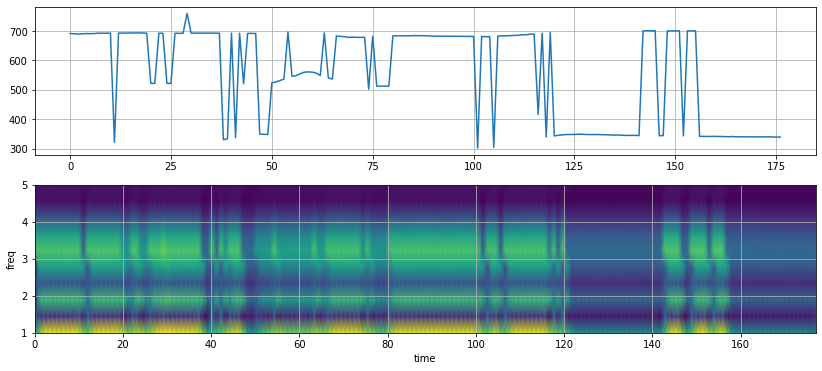

In [22]:
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(x)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.grid()
plt.xlabel("time")
plt.ylabel("freq")
plt.show()